In [182]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import string
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#query to be searched titan watch review
search_query="titan+men+watches"
#base url amazon
base_url="https://www.amazon.in/s?k="
#formation of url
url=base_url+search_query
print(url)

https://www.amazon.in/s?k=titan+men+watches


In [46]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus\
    &qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '2',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [47]:
#function to get page content
def get_soup(url):
  r=requests.get(url,headers=headers,params={'url':url,'wait':2})
  soup=BeautifulSoup(r.text,'html.parser')
  return soup

In [39]:
#function to get review list
review_list=[]
def get_reviews(soup):
  reviews=soup.findAll('div',{'data-hook':'review'})
  try:
    for item in reviews:
       review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
       review_list.append(review)
  except:
        pass


In [48]:
#function for stopping condition
for x in tqdm_notebook(range(1,1000)):
  soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
  get_reviews(soup)
  if not soup.find('li',{'class':'a-disabled a-last'}):
    pass
  else:
    break

<ipython-input-48-cd687b008a84>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [49]:
review_list

[{'Rating': 4.0,
  'Title': '4.0 out of 5 stars\nGood phone-could have been better !',
  'Review': "I've purchased the 6GB version of this phone which comes with an extendable 2 GB RAM (virtual memory) capability.Good phone, but being the least expensive category offering from One-plus, there are some small evident points that will get noticed. First thing is the confusing placement of the power button (and hence the finger sensor). Daily handling of the mobile phone feels a bit annoying with fingers locking/un-locking the phone while you try to handle it and place it into Your pockets. Although this is not a big problem, it is still something to think about. The second point is about lag here and there (only to a noticeable bit), which i am hoping might go away with updates/improvements. The third point is about the speaker volume. The speaker is good only at its near maximum levels i.e the volume does not seem to creep up steadily, rather louds out only at its top volume limits. The 

In [86]:
data1=pd.DataFrame(review_list)
data1.head()

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,4.0 out of 5 stars\nSuper product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,4.0 out of 5 stars\nGood phone,Cam is nt that good,12 June 2023
4,4.0,4.0 out of 5 stars\nGood phone,Thnx amazon and one plus,11 June 2023


In [87]:
data1.shape

(3010, 4)

In [89]:
data1.to_csv('amazon_review_oneplus2.csv')

In [90]:
data1.head()

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,4.0 out of 5 stars\nA mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,4.0 out of 5 stars\nSuper product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,4.0 out of 5 stars\nGood phone,Cam is nt that good,12 June 2023
4,4.0,4.0 out of 5 stars\nGood phone,Thnx amazon and one plus,11 June 2023


In [91]:
data1['Title']

0       4.0 out of 5 stars\nGood phone-could have been...
1              4.0 out of 5 stars\nA mildly perfect phone
2                       4.0 out of 5 stars\nSuper product
3                          4.0 out of 5 stars\nGood phone
4                          4.0 out of 5 stars\nGood phone
                              ...                        
3005    3.0 out of 5 stars\nHanset is as per expectati...
3006                     5.0 out of 5 stars\nCamera super
3007                   5.0 out of 5 stars\nValuable phone
3008                             5.0 out of 5 stars\nNice
3009    1.0 out of 5 stars\nPhone is not performing up...
Name: Title, Length: 3010, dtype: object

In [92]:
temp=0
for i in data1['Title']:
  data1['Title'][temp]=i.split('\n')[1]
  temp+=1

<ipython-input-92-d5fc61acf89a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Title'][temp]=i.split('\n')[1]


In [93]:
data1['Title']

0                     Good phone-could have been better !
1                                  A mildly perfect phone
2                                           Super product
3                                              Good phone
4                                              Good phone
                              ...                        
3005    Hanset is as per expectation. But ringtone is ...
3006                                         Camera super
3007                                       Valuable phone
3008                                                 Nice
3009                Phone is not performing upto the mark
Name: Title, Length: 3010, dtype: object

In [94]:
data1.head()

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Good phone,Cam is nt that good,12 June 2023
4,4.0,Good phone,Thnx amazon and one plus,11 June 2023


In [95]:
demo=data1.Review_Date[22].replace("Reviewed in India 🇮🇳 on ","")

In [96]:
demo

'30 May 2023'

In [97]:
temp=0
for i in data1['Review_Date']:
  data1['Review_Date'][temp]=i.replace("Reviewed in India 🇮🇳 on ","")
  temp+=1


<ipython-input-97-52a43bc36e21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Review_Date'][temp]=i.replace("Reviewed in India 🇮🇳 on ","")


In [99]:
data1

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Good phone,Cam is nt that good,12 June 2023
4,4.0,Good phone,Thnx amazon and one plus,11 June 2023
...,...,...,...,...
3005,3.0,Hanset is as per expectation. But ringtone is ...,Hanset is as per expectation. But ringtone is ...,20 May 2022
3006,5.0,Camera super,Battery very good 👍👍👍,17 November 2022
3007,5.0,Valuable phone,Overall good bugget phone but front camera not...,30 August 2022
3008,5.0,Nice,Fast charging,25 November 2022


In [100]:
data1.to_csv('extracted_and_transformed_review_amazon.csv')

#exploration

In [102]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       3010 non-null   float64
 1   Title        3010 non-null   object 
 2   Review       3010 non-null   object 
 3   Review_Date  3010 non-null   object 
dtypes: float64(1), object(3)
memory usage: 94.2+ KB


In [103]:
data1.Rating.describe().T

count    3010.000000
mean        4.141860
std         0.821857
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [104]:
data1['Rating'].value_counts()

4.0    1473
5.0    1061
3.0     359
2.0      76
1.0      41
Name: Rating, dtype: int64

In [106]:
data1['word_count']=data1.Review.apply(lambda x: len(str(x).split(" ")))
data1[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,I will try to keep this review short. This rev...,216
2,This review is after using this phone for 2 mo...,61
3,Cam is nt that good,5
4,Thnx amazon and one plus,5


In [107]:
data1['char_count']=data1.Review.str.len()
data1[['Review','word_count','char_count']].head()

,Review,word_count,char_count
0,I've purchased the 6GB version of this phone w...,299,1715
1,I will try to keep this review short. This rev...,216,1189
2,This review is after using this phone for 2 mo...,61,355
3,Cam is nt that good,5,19
4,Thnx amazon and one plus,5,24


spelling correction

In [114]:
from textblob import TextBlob
data1.Review[:5].apply(lambda x:str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    His review is after using this phone for 2 mon...
3                                   Am is it that good
4                             Thnx amazon and one plus
Name: Review, dtype: object

"this" is convorted to 'HIS' , "CAM" which is camera but after correcting it is showing as 'AM' lets skip this correction

FEATURE ENGG

In [119]:
#data1.Review_Date.str.split(" ").str[0],data1.Review_Date.str.split(" ").str[1],data1.Review_Date.str.split(" ").str[2]
print(data1.Review_Date.str.split(" "))

0       [19, December, 2022]
1        [12, January, 2023]
2            [3, June, 2023]
3           [12, June, 2023]
4           [11, June, 2023]
                ...         
3005         [20, May, 2022]
3006    [17, November, 2022]
3007      [30, August, 2022]
3008    [25, November, 2022]
3009       [11, April, 2023]
Name: Review_Date, Length: 3010, dtype: object


In [120]:
data1['date']=data1.Review_Date.str.split(" ").str[0]
data1['month']=data1.Review_Date.str.split(" ").str[1]
data1['year']=data1.Review_Date.str.split(" ").str[2]
data1[['date','month','year']].head()

,date,month,year
0,19,December,2022
1,12,January,2023
2,3,June,2023
3,12,June,2023
4,11,June,2023


In [121]:
data1.month.value_counts()

April        450
May          433
March        323
June         253
October      237
November     223
February     217
January      200
December     191
August       170
July         158
September    155
Name: month, dtype: int64

In [122]:
data1.month=data1.month.replace({'April':4, 'May':5 ,'March':3,'June':6,'October':10 ,'November':11,'February':2,'January':1, 'December':12,'August':8, 'July':7,'September':9 })

In [123]:
data1.head()

,Rating,Title,Review,Review_Date,word_count,char_count,date,month,year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,299,1715,19,12,2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,216,1189,12,1,2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023,61,355,3,6,2023
3,4.0,Good phone,Cam is nt that good,12 June 2023,5,19,12,6,2023
4,4.0,Good phone,Thnx amazon and one plus,11 June 2023,5,24,11,6,2023


In [125]:
review=data1.copy()
review.drop(['Review_Date','word_count','char_count'],axis=1,inplace=True)
review.head()

,Rating,Title,Review,date,month,year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19,12,2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12,1,2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3,6,2023
3,4.0,Good phone,Cam is nt that good,12,6,2023
4,4.0,Good phone,Thnx amazon and one plus,11,6,2023


In [126]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  3010 non-null   float64
 1   Title   3010 non-null   object 
 2   Review  3010 non-null   object 
 3   date    3010 non-null   object 
 4   month   3010 non-null   int64  
 5   year    3010 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 141.2+ KB


In [128]:
review[['date','year']]=review[['date','year']].astype('int64')

In [129]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  3010 non-null   float64
 1   Title   3010 non-null   object 
 2   Review  3010 non-null   object 
 3   date    3010 non-null   int64  
 4   month   3010 non-null   int64  
 5   year    3010 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 141.2+ KB


In [143]:
daywiswReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    31 non-null     int64
 1   Review  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


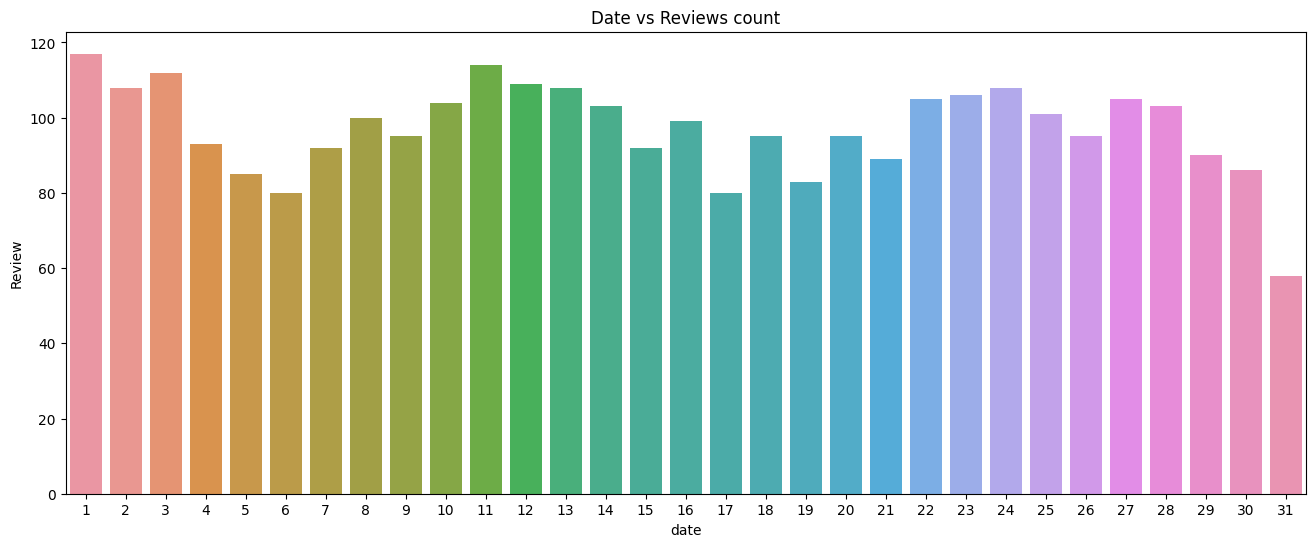

In [149]:
daywiswReview=pd.DataFrame(review.groupby('date')['Review'].count()).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='date',y='Review',data=daywiswReview)
plt.title('Date vs Reviews count')
plt.show()

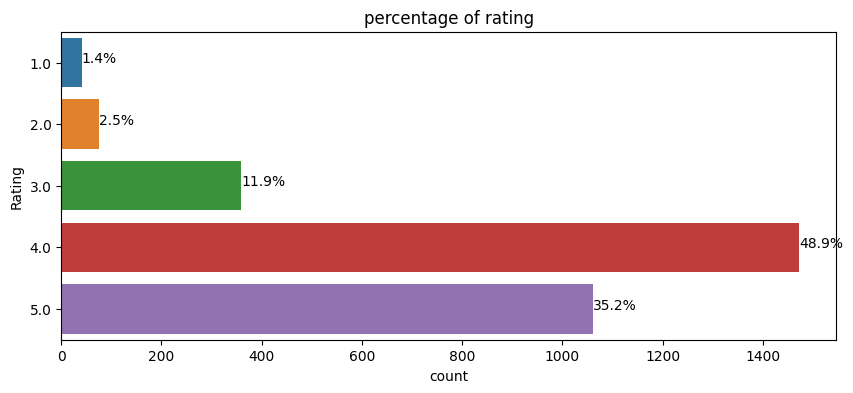

In [161]:
plt.figure(figsize=(10,4))
plt.title('percentage of rating')
ax=sns.countplot(y='Rating',data=review)
total=len(review)
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x=p.get_x()+p.get_width()+0.02
  y=p.get_y()+p.get_height()/2
  ax.annotate(percentage,(x,y))


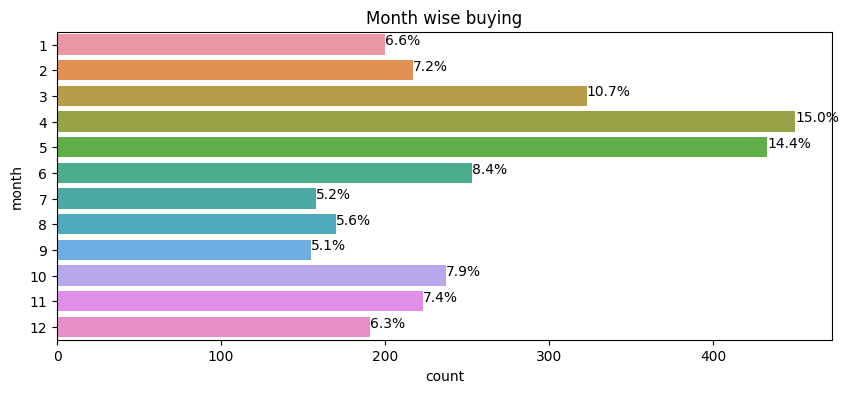

In [165]:

plt.figure(figsize=(10,4))
plt.title('Month wise buying')
ax=sns.countplot(y='month',data=data1)
total=len(review)
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x=p.get_x()+p.get_width()+0.02
  y=p.get_y()+p.get_height()/2
  ax.annotate(percentage,(x,y))



text processing

In [223]:
data=pd.DataFrame(review.iloc[:,2])
data.head()

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,This review is after using this phone for 2 mo...
3,Cam is nt that good
4,Thnx amazon and one plus


In [224]:
nltk.download('stopwords')
stop_txt=pd.read_fwf("/content/sample_data/stop.txt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
my_stop_word=stopwords.words('english')
my_stop_word.extend(stop_txt.a)
print(my_stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [226]:
data['Review']=data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in my_stop_word))
data['Review']

0       i've purchased 6gb version phone extendable 2 ...
1       i review short. this review perspective averag...
2       this review phone 2 months.very nice phone bud...
3                                             cam nt good
4                                             thnx amazon
                              ...                        
3005    hanset expectation. but ringtone continues red...
3006                                     battery good 👍👍👍
3007    overall good bugget phone front camera good. u...
3008                                        fast charging
3009    all features mobile good speaker phone......so...
Name: Review, Length: 3010, dtype: object

In [227]:
data.iloc[0,:]

Review    i've purchased 6gb version phone extendable 2 ...
Name: 0, dtype: object

In [228]:
#lematization
!python -m spacy download en_core_web_sm

2023-06-17 09:22:59.557603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [229]:
#removal of punction
import re
import nltk
nltk.download('wordnet')
corpus=[]
lemmat=WordNetLemmatizer()
for i in tqdm_notebook(range(0,len(data))):
  cleaned=re.sub('[^a-zA-Z]', " ", data["Review"][i])
  cleaned=cleaned.lower()
  cleaned=cleaned.split()
  cleaned=[lemmat.lemmatize(word) for word in cleaned if word not in my_stop_word]
  cleaned=' '.join(cleaned)
  corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-229-5d06a21e916e>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,len(data))):


  0%|          | 0/3010 [00:00<?, ?it/s]

In [246]:
clean_df=pd.DataFrame({'cleaned_review':corpus,'uncleaned_review':data['Review']})
clean_df.head(10)

,cleaned_review,uncleaned_review
0,purchased gb version phone extendable gb ram v...,i've purchased 6gb version phone extendable 2 ...
1,review short review perspective average user b...,i review short. this review perspective averag...
2,review phone month nice phone budget ram expan...,this review phone 2 months.very nice phone bud...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon
5,bought mother required,i bought mother required
6,good,very good
7,nice cell phone,nice cell phone
8,nice phone good image quality,"nice phone, good image quality 👍🏻😄"
9,,like


In [247]:
#removal of @word
def remove_pattern(text, pattern_regex):
  r=re.findall(pattern_regex,text)
  for i in r:
    text=re.sub(i,'',text)
  return text

In [248]:
clean_df['cleaned_review']=np.vectorize(remove_pattern)(clean_df['cleaned_review'],"@[\w]*")
clean_df.head(10)

,cleaned_review,uncleaned_review
0,purchased gb version phone extendable gb ram v...,i've purchased 6gb version phone extendable 2 ...
1,review short review perspective average user b...,i review short. this review perspective averag...
2,review phone month nice phone budget ram expan...,this review phone 2 months.very nice phone bud...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon
5,bought mother required,i bought mother required
6,good,very good
7,nice cell phone,nice cell phone
8,nice phone good image quality,"nice phone, good image quality 👍🏻😄"
9,,like


In [249]:
#removal of https
clean_review=[]
for index,row in clean_df.iterrows():
  words_without_link=[words for words in row.cleaned_review.split() if 'http' not in words]
  clean_review.append(' '.join(words_without_link))
clean_df['cleaned_review']=clean_review

In [234]:
clean_df.head(10)

,cleaned_review,uncleaned_review
0,purchased gb version phone extendable gb ram v...,i've purchased 6gb version phone extendable 2 ...
1,review short review perspective average user b...,i review short. this review perspective averag...
2,review phone month nice phone budget ram expan...,this review phone 2 months.very nice phone bud...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon
5,bought mother required,i bought mother required
6,good,very good
7,nice cell phone,nice cell phone
8,nice phone good image quality,"nice phone, good image quality 👍🏻😄"
9,,like


In [250]:
clean_df.shape

(3010, 2)

In [236]:
clean_df[clean_df['cleaned_review']=='']

,cleaned_review,uncleaned_review
9,,like
37,,ok
91,,best
104,,
138,,
...,...,...
2954,,
2976,,
2987,,
2989,,ok


In [237]:
#there are 227 empty rows so we have to remove those
clean_df=clean_df[clean_df['cleaned_review']!='']
print(clean_df[clean_df['cleaned_review']==''])

Empty DataFrame
Columns: [cleaned_review, uncleaned_review]
Index: []


In [238]:
clean_df.shape

(2783, 2)

In [239]:
#lest check the duplicate row
clean_df[clean_df.duplicated]

,cleaned_review,uncleaned_review
24,good,good
30,good,good
35,good,good
38,good phone,good phone
43,good,good
...,...,...
2984,money,value money
2990,good,good
2993,good,very good 👍
3002,good,good


In [251]:
#lest drop those duplicates
clean_df=clean_df.drop_duplicates()
clean_df=clean_df.reset_index(drop=True)
clean_df.head()

,cleaned_review,uncleaned_review
0,purchased gb version phone extendable gb ram v...,i've purchased 6gb version phone extendable 2 ...
1,review short review perspective average user b...,i review short. this review perspective averag...
2,review phone month nice phone budget ram expan...,this review phone 2 months.very nice phone bud...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon


In [252]:
clean_df.shape

(2125, 2)

In [256]:
#tokenization
clean_df['tokenized']=clean_df.cleaned_review.apply(lambda x: nltk.word_tokenize(x))
clean_df.head(10)

,cleaned_review,uncleaned_review,tokenized
0,purchased gb version phone extendable gb ram v...,i've purchased 6gb version phone extendable 2 ...,"[purchased, gb, version, phone, extendable, gb..."
1,review short review perspective average user b...,i review short. this review perspective averag...,"[review, short, review, perspective, average, ..."
2,review phone month nice phone budget ram expan...,this review phone 2 months.very nice phone bud...,"[review, phone, month, nice, phone, budget, ra..."
3,cam nt good,cam nt good,"[cam, nt, good]"
4,thnx amazon,thnx amazon,"[thnx, amazon]"
5,bought mother required,i bought mother required,"[bought, mother, required]"
6,good,very good,[good]
7,nice cell phone,nice cell phone,"[nice, cell, phone]"
8,nice phone good image quality,"nice phone, good image quality 👍🏻😄","[nice, phone, good, image, quality]"
9,,like,[]


In [258]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemme=SnowballStemmer('english')

stem_df=pd.DataFrame()
stem_df['stem']=clean_df.cleaned_review.apply(lambda x : " ".join([stemme.stem(word) for word in x.split()]))
stem_df['cleaned_review']=clean_df.cleaned_review
stem_df

,stem,cleaned_review
0,purchas gb version phone extend gb ram virtual...,purchased gb version phone extendable gb ram v...
1,review short review perspect averag user buy p...,review short review perspective average user b...
2,review phone month nice phone budget ram expan...,review phone month nice phone budget ram expan...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon
...,...,...
2120,batteri life bad mobil mi cell phone,battery life bad mobile mi cell phone
2121,hanset expect rington continu reduc increas si...,hanset expectation ringtone continues reduces ...
2122,batteri good,battery good
2123,good bugget phone front camera good phone onep...,good bugget phone front camera good phone onep...


In [261]:
#lemmatization
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

lemm_df=pd.DataFrame()
lemm_df['lema']=clean_df.cleaned_review.apply(lambda x : " ".join([word_lemmatizer.lemmatize(word) for word in x.split()]))
lemm_df['cleaned_review']=clean_df.cleaned_review
lemm_df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,lema,cleaned_review
0,purchased gb version phone extendable gb ram v...,purchased gb version phone extendable gb ram v...
1,review short review perspective average user b...,review short review perspective average user b...
2,review phone month nice phone budget ram expan...,review phone month nice phone budget ram expan...
3,cam nt good,cam nt good
4,thnx amazon,thnx amazon
...,...,...
2120,battery life bad mobile mi cell phone,battery life bad mobile mi cell phone
2121,hanset expectation ringtone continues reduces ...,hanset expectation ringtone continues reduces ...
2122,battery good,battery good
2123,good bugget phone front camera good phone onep...,good bugget phone front camera good phone onep...


Featuer extraction

In [275]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(lemm_df['lema'])


In [276]:
print(cv.get_feature_names_out()[109:200])

['annoying' 'answer' 'answering' 'antutu' 'anurag' 'anymore' 'aod'
 'aowsome' 'ap' 'aperture' 'apex' 'app' 'apparently' 'appearance'
 'appearing' 'appears' 'apple' 'application' 'applied' 'apply' 'applying'
 'appointed' 'appointment' 'approx' 'apps' 'appx' 'april' 'apt' 'apx'
 'aqua' 'arch' 'area' 'areabut' 'arepros' 'arethe' 'arrange' 'artificial'
 'arun' 'asked' 'asks' 'aspect' 'assembled' 'assigned' 'assistance'
 'assume' 'asume' 'atlast' 'atleast' 'atlst' 'attache' 'attached' 'attend'
 'attract' 'attraction' 'attractive' 'attracts' 'audible' 'audio' 'august'
 'aur' 'authorised' 'authorized' 'auto' 'automatic' 'automatically'
 'automaticallycamera' 'autoslim' 'availablility' 'avarage' 'avareg'
 'avarege' 'avargeoverall' 'average' 'averageconclusion'
 'averagefingerprint' 'averagegesture' 'averageif' 'averageoverall'
 'averege' 'avery' 'avg' 'avoid' 'avrage' 'avragevery' 'awake' 'aware'
 'awasome' 'awesome' 'awesomebattery' 'awesomedisplay' 'awesomein']


In [277]:
print(cv.get_feature_names_out()[:100])

['aacha' 'aaj' 'aaplog' 'aayega' 'ab' 'abhi' 'abnd' 'absence' 'absent'
 'absolutely' 'acceptable' 'accepts' 'access' 'accessory' 'accha'
 'accommodated' 'accomplished' 'account' 'accurate' 'acha' 'achcha'
 'achha' 'achhe' 'achi' 'achievable' 'achieve' 'achieved' 'activate'
 'activated' 'activates' 'activity' 'ad' 'adapter' 'adaptor' 'add' 'added'
 'addict' 'addition' 'additional' 'address' 'adequate' 'adjust' 'adjusted'
 'adjusting' 'adjustment' 'admit' 'adopted' 'adopter' 'adoptor'
 'advantage' 'advertised' 'advertising' 'advice' 'advised' 'aesthetic'
 'aesthetically' 'afet' 'affect' 'afford' 'affordable' 'agai' 'aged'
 'agent' 'aggravating' 'agni' 'ago' 'agree' 'ah' 'ahead' 'ai' 'aince'
 'airtel' 'al' 'albeit' 'alert' 'alexa' 'alike' 'allram' 'allright' 'alot'
 'alril' 'alsothe' 'alternate' 'altogether' 'amazed' 'amazing' 'amazon'
 'amazonit' 'ambient' 'american' 'amezing' 'amezingcharging' 'amezon'
 'ammolated' 'amo' 'amoled' 'amolid' 'amount' 'amountand' 'ample']


In [278]:
print(cv.vocabulary_)

{'purchased': 2339, 'gb': 1187, 'version': 3152, 'phone': 2162, 'extendable': 994, 'ram': 2375, 'virtual': 3164, 'memory': 1800, 'capability': 436, 'good': 1238, 'expensive': 980, 'category': 462, 'offering': 1992, 'small': 2743, 'evident': 951, 'point': 2225, 'noticed': 1963, 'thing': 2975, 'confusing': 627, 'placement': 2200, 'power': 2247, 'button': 403, 'finger': 1077, 'sensor': 2653, 'daily': 706, 'handling': 1325, 'mobile': 1857, 'feel': 1054, 'bit': 309, 'annoying': 109, 'locking': 1688, 'handle': 1323, 'place': 2199, 'pocket': 2222, 'big': 301, 'problem': 2291, 'lag': 1594, 'noticeable': 1962, 'hoping': 1398, 'update': 3101, 'improvement': 1448, 'speaker': 2785, 'volume': 3178, 'maximum': 1780, 'level': 1646, 'creep': 686, 'steadily': 2824, 'louds': 1709, 'top': 3012, 'limit': 1669, 'fourth': 1130, 'final': 1070, 'camera': 419, 'shoot': 2683, 'color': 567, 'realistic': 2415, 'photo': 2184, 'day': 716, 'light': 1659, 'skin': 2719, 'tone': 3009, 'tend': 2946, 'coloured': 572, 'le

In [279]:
vect_DF=pd.DataFrame(cv.vocabulary_,columns=cv.vocabulary_.keys(),index=['frequency']).T
vect_DF

,frequency
purchased,2339
gb,1187
version,3152
phone,2162
extendable,994
...,...
bugget,385
mil,1826
jata,1528
isliye,1509


Bigram and Trigram analysis


In [285]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=1000)
matrix_ngram=cv_ngram_range.fit_transform(lemm_df['lema'])

In [287]:
cv_ngram_range.get_feature_names_out()[:100]

array(['absolutely', 'accessory', 'accha', 'add', 'added', 'affordable',
       'ago', 'ai', 'alert', 'alert slider', 'amazing', 'amazing phone',
       'amazon', 'amoled', 'amoled display', 'amount', 'android',
       'android auto', 'android phone', 'angle', 'app', 'apple',
       'application', 'apps', 'aspect', 'atleast', 'audio', 'auto',
       'automatically', 'avarage', 'average', 'average battery',
       'average camera', 'average camera quality', 'average phone',
       'average user', 'awesome', 'awesome camera',
       'awesome camera quality', 'awesome phone', 'awsome', 'back',
       'back camera', 'back cover', 'back side', 'background', 'backup',
       'backup good', 'bad', 'bad camera', 'badhiya', 'bahut', 'band',
       'based', 'basic', 'battery', 'battery average', 'battery back',
       'battery backup', 'battery backup camera', 'battery backup good',
       'battery camera', 'battery charge', 'battery charging',
       'battery drain', 'battery drain fast', 'batt

In [289]:
cv_ngram_range.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

TF_IDF


In [294]:
tfidf_ngram_max_feature=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidf_ngram_max_feature.fit_transform(lemm_df['lema'])

In [295]:
print(tfidf_ngram_max_feature.get_feature_names_out())

['absolutely' 'affordable' 'amazing' 'amazon' 'amoled' 'amoled display'
 'amount' 'android' 'android auto' 'android phone' 'angle' 'app' 'apps'
 'audio' 'auto' 'automatically' 'average' 'average camera' 'average phone'
 'awesome' 'awesome camera' 'back' 'back camera' 'back cover' 'backup'
 'backup good' 'bad' 'basic' 'battery' 'battery back' 'battery backup'
 'battery backup good' 'battery camera' 'battery charging' 'battery drain'
 'battery draining' 'battery good' 'battery life' 'battery life camera'
 'battery life good' 'battery performance' 'beautiful' 'bgmi' 'big' 'bit'
 'blue' 'bought' 'bought phone' 'box' 'brand' 'brightness' 'budget'
 'budget friendly' 'budget phone' 'bug' 'build' 'build quality' 'button'
 'buy' 'buy phone' 'buying' 'call' 'call recording' 'calling' 'cam'
 'camara' 'camera' 'camera average' 'camera battery' 'camera clarity'
 'camera display' 'camera feature' 'camera good' 'camera performance'
 'camera phone' 'camera quality' 'camera quality average'
 'camera qu

In [296]:
print(tfidf_matrix_ngram.toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.1364797]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


Name-Entity-Recognation

In [298]:
review_list=[review.strip() for review in lemm_df['lema']]
review_list=[comment for comment in review_list if comment]
review_text=' '.join(review_list)
review_text

'purchased gb version phone extendable gb ram virtual memory capability good phone expensive category offering small evident point noticed thing confusing placement power button finger sensor daily handling mobile phone feel bit annoying finger locking locking phone handle place pocket big problem point lag noticeable bit hoping update improvement point speaker volume speaker good maximum level volume creep steadily louds top volume limit fourth point final camera shoot color realistic photo day light skin tone tend coloured led flash average good awesome part phone practicality daily user strong brand part pricing offered battery life good charging capability impressive moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean complain clean phone small improvement make rounder cut rest keeping branding mind review short review perspective average user buy phone start change adjust complaining device price tool pro camera pretty

In [300]:
nlp=spacy.load('en_core_web_sm')

one_block=review_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [301]:
for token in doc_block[100:200]:
  print(token,token.pos_)

phone NOUN
build NOUN
phone NOUN
apt ADJ
survive VERB
normal ADJ
fall NOUN
mishap NOUN
happening VERB
phone NOUN
feel VERB
solid ADJ
hand NOUN
stock NOUN
android PROPN
clean PROPN
complain VERB
clean ADJ
phone NOUN
small ADJ
improvement NOUN
make VERB
rounder NOUN
cut NOUN
rest NOUN
keeping VERB
branding VERB
mind NOUN
review PROPN
short PROPN
review NOUN
perspective NOUN
average ADJ
user NOUN
buy VERB
phone NOUN
start NOUN
change NOUN
adjust VERB
complaining VERB
device NOUN
price NOUN
tool NOUN
pro ADJ
camera NOUN
pretty ADV
good ADJ
con NOUN
software NOUN
sweet ADJ
feature NOUN
make VERB
sweet ADJ
negative ADJ
speed NOUN
power NOUN
run NOUN
apps NOUN
people NOUN
generally ADV
issue VERB
build VERB
quality NOUN
good ADJ
sort NOUN
case NOUN
con PROPN
con PROPN
battery NOUN
charge NOUN
day NOUN
browse NOUN
internet NOUN
camera NOUN
time NOUN
watch VERB
youtube PROPN
instagram PROPN
facebook NOUN
medium NOUN
apps NOUN
hour NOUN
mid ADJ
brightness NOUN
maximum ADJ
achievable ADJ
screen N

In [302]:
#filtering noun and verb
noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb)

['purchased', 'version', 'phone', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'handle', 'place', 'pocket', 'problem', 'point', 'lag', 'bit', 'hoping', 'update', 'improvement', 'point', 'speaker', 'volume', 'speaker', 'level', 'volume', 'creep', 'volume', 'limit', 'point', 'camera', 'shoot', 'color', 'photo', 'day', 'skin', 'tone', 'tend', 'coloured', 'led', 'flash', 'part', 'phone', 'practicality', 'user', 'brand', 'part', 'pricing', 'offered', 'battery', 'life', 'charging', 'capability', 'impressive', 'moved', 'phone', 'build', 'phone', 'survive', 'fall', 'mishap', 'happening', 'phone', 'feel', 'hand', 'stock', 'complain', 'phone', 'improvement', 'make', 'rounder', 'cut', 'rest', 'keeping', 'branding', 'mind', 'review', 'perspective', 'user', 'buy', 'phone', 'start', 'change', 'adjust', 'complaining', 'devi

In [304]:
cv=CountVectorizer()
X=cv.fit_transform(noun_verb)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1] ,reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df.head(10)

,word,count
0,phone,1202
1,camera,836
2,battery,535
3,quality,480
4,price,279
5,product,245
6,performance,189
7,day,188
8,charging,181
9,display,173


<Axes: title={'center': 'top 30 used noun and verb'}, xlabel='word'>

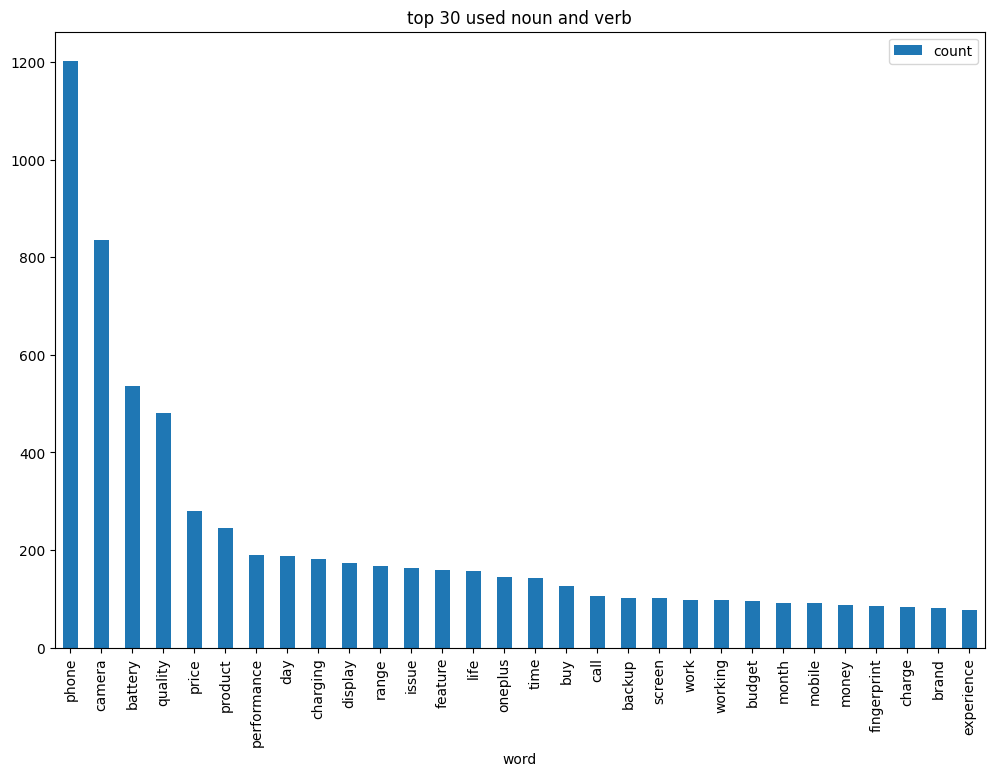

In [305]:
wd_df[0:30].plot.bar(x='word',y='count',figsize=(12,8),title="top 30 used noun and verb")

In [306]:
affin=pd.read_csv("/content/sample_data/Afinn.csv",sep=',',encoding='latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [309]:
affinity_score=affin.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [312]:
user_review_sentiment=data1[['Review']]
user_review_sentiment.head()

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,This review is after using this phone for 2 mo...
3,Cam is nt that good
4,Thnx amazon and one plus


In [313]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    for word in sentence :
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [314]:
calculate_sentiment('good')

3

In [315]:
user_review_sentiment['sentiment_value']=user_review_sentiment['Review'].apply(calculate_sentiment)
user_review_sentiment

<ipython-input-315-4abb834311d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_review_sentiment['sentiment_value']=user_review_sentiment['Review'].apply(calculate_sentiment)


,Review,sentiment_value
0,I've purchased the 6GB version of this phone w...,27.0
1,I will try to keep this review short. This rev...,9.0
2,This review is after using this phone for 2 mo...,13.0
3,Cam is nt that good,3.0
4,Thnx amazon and one plus,0.0
...,...,...
3005,Hanset is as per expectation. But ringtone is ...,1.0
3006,Battery very good 👍👍👍,3.0
3007,Overall good bugget phone but front camera not...,6.0
3008,Fast charging,0.0


In [316]:
user_review_sentiment['word_count']=user_review_sentiment['Review'].str.split().apply(len)
user_review_sentiment.head()

<ipython-input-316-ee7324a66379>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_review_sentiment['word_count']=user_review_sentiment['Review'].str.split().apply(len)


,Review,sentiment_value,word_count
0,I've purchased the 6GB version of this phone w...,27.0,298
1,I will try to keep this review short. This rev...,9.0,216
2,This review is after using this phone for 2 mo...,13.0,61
3,Cam is nt that good,3.0,5
4,Thnx amazon and one plus,0.0,5


In [318]:
user_review_sentiment.sort_values(by='sentiment_value',ascending=False)

,Review,sentiment_value,word_count
258,I got this mobile for ₹ 16999 which was an awe...,86.0,496
373,OnePlus Nord CE 5G is an excellent mid-range p...,46.0,172
100,The media could not be loaded.\n ...,43.0,539
1678,I have ordered this item after doing lot of re...,41.0,253
206,Writing the reviews after 3 days of UsageDesig...,39.0,498
...,...,...,...
2936,,NaN,0
2952,,NaN,0
2954,,NaN,0
2976,,NaN,0


In [319]:
user_review_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_value,2901.0,3.418132,4.595193,-11.0,0.0,3.0,5.0,86.0
word_count,3010.0,18.120930,35.935228,0.0,2.0,7.0,20.0,539.0


In [320]:
user_review_sentiment[user_review_sentiment['sentiment_value']>0]

,Review,sentiment_value,word_count
0,I've purchased the 6GB version of this phone w...,27.0,298
1,I will try to keep this review short. This rev...,9.0,216
2,This review is after using this phone for 2 mo...,13.0,61
3,Cam is nt that good,3.0,5
6,Very good,3.0,2
...,...,...,...
3004,I like it,2.0,3
3005,Hanset is as per expectation. But ringtone is ...,1.0,32
3006,Battery very good 👍👍👍,3.0,4
3007,Overall good bugget phone but front camera not...,6.0,29


In [322]:
user_review_sentiment[user_review_sentiment['sentiment_value']<0]

,Review,sentiment_value,word_count
53,Not bad,-3.0,2
62,Processor in this price range could be better ...,-1.0,17
111,no problem,-3.0,2
122,I am using dis mobile and it is very nyc and n...,-3.0,13
124,"Worst Experience, Product is not working prope...",-3.0,12
...,...,...,...
2960,"Hi, I am using Nord ce 2 from 2 days, I bought...",-1.0,110
2966,Am disappointed with battery because comparing...,-2.0,22
2979,Camera quality is poor,-2.0,4
3001,Decent phone but with its shortcomings.Pros --...,-1.0,29


In [323]:
user_review_sentiment[user_review_sentiment['sentiment_value']==0]

,Review,sentiment_value,word_count
4,Thnx amazon and one plus,0.0,5
5,I bought it for my mother and this is as required,0.0,11
10,Wide angle camera ki kami h,0.0,6
21,Battery drains fast. Rest is okay,0.0,6
25,While using apps device is starting heating,0.0,7
...,...,...,...
2984,Value of money,0.0,3
2988,Option are limited in settings...Battery is Ma...,0.0,21
2989,Ok,0.0,1
3000,Better Performance,0.0,2


In [ ]:
def comment_analysis(int x):
  if(x==0):
    retun ('nutral')
  elif(x<0):
    return 'negative'
  else(x>0):
    return 'postive'

In [324]:
user_review_sentiment['status']=user_review_sentiment['sentiment_value'].apply(lambda x: 'postive' if x>0 else( 'Negative' if x<0 else 'Nutral'))
user_review_sentiment.head()

<ipython-input-324-1fb8d30769b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_review_sentiment['status']=user_review_sentiment['sentiment_value'].apply(lambda x: 'postive' if x>0 else( 'Negative' if x<0 else 'Nutral'))


,Review,sentiment_value,word_count,status
0,I've purchased the 6GB version of this phone w...,27.0,298,postive
1,I will try to keep this review short. This rev...,9.0,216,postive
2,This review is after using this phone for 2 mo...,13.0,61,postive
3,Cam is nt that good,3.0,5,postive
4,Thnx amazon and one plus,0.0,5,Nutral


In [330]:
user_review_sentiment['status'].value_counts()

postive     2104
Nutral       718
Negative     188
Name: status, dtype: int64

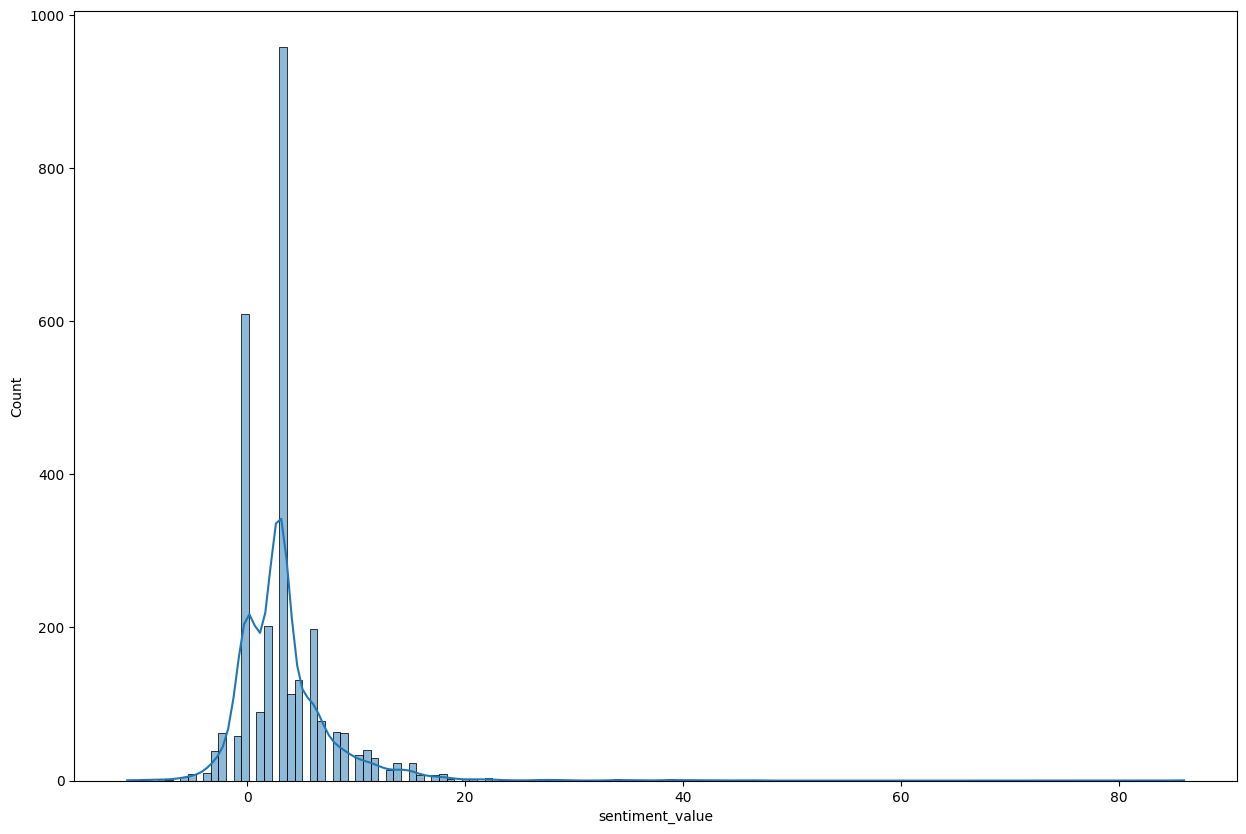

In [334]:
plt.figure(figsize=(15,10))
sns.histplot(user_review_sentiment['sentiment_value'],kde=True)
plt.show()

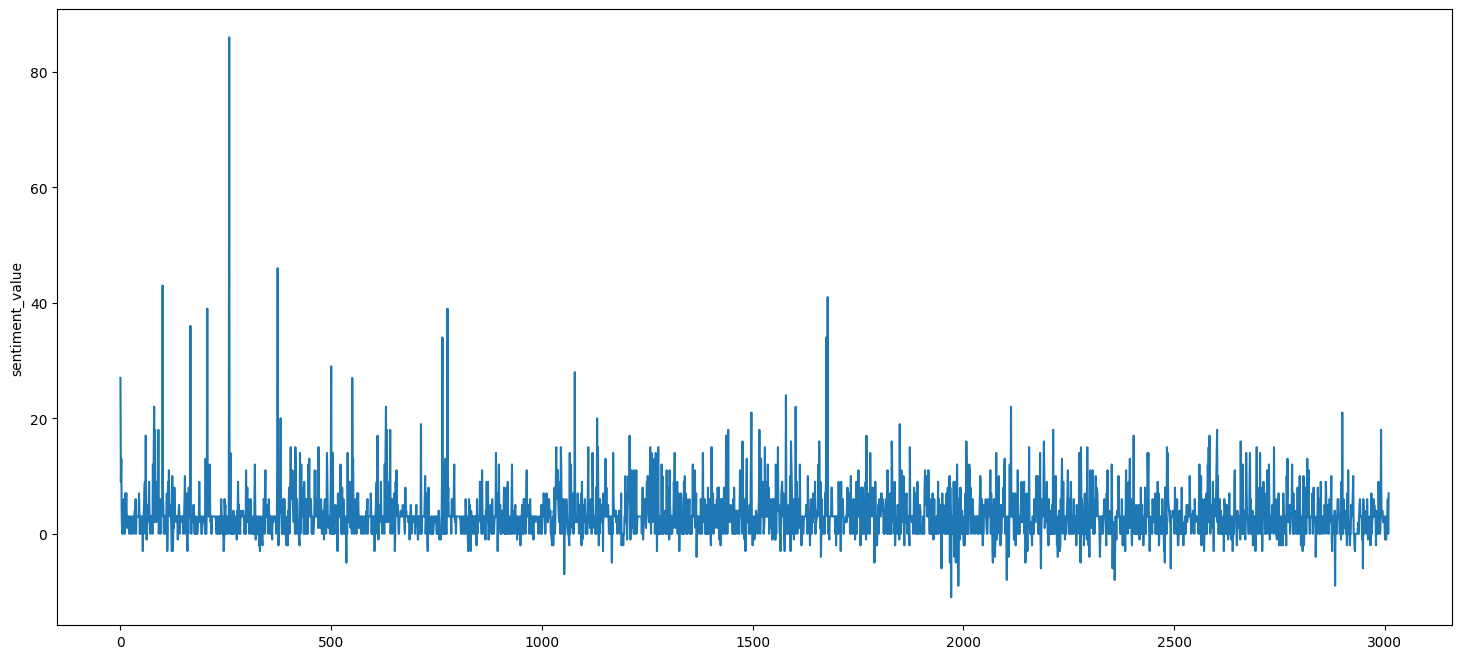

In [336]:
plt.figure(figsize=(18,8))
sns.lineplot(y='sentiment_value',x=range(0,len(user_review_sentiment)),data=user_review_sentiment)
plt.show()

VISUALIZATION THROUGH WORD CLOUD

In [337]:
lemm_df['lema']


0       purchased gb version phone extendable gb ram v...
1       review short review perspective average user b...
2       review phone month nice phone budget ram expan...
3                                             cam nt good
4                                             thnx amazon
                              ...                        
2120                battery life bad mobile mi cell phone
2121    hanset expectation ringtone continues reduces ...
2122                                         battery good
2123    good bugget phone front camera good phone onep...
2124    feature mobile good speaker phone sound clear ...
Name: lema, Length: 2125, dtype: object

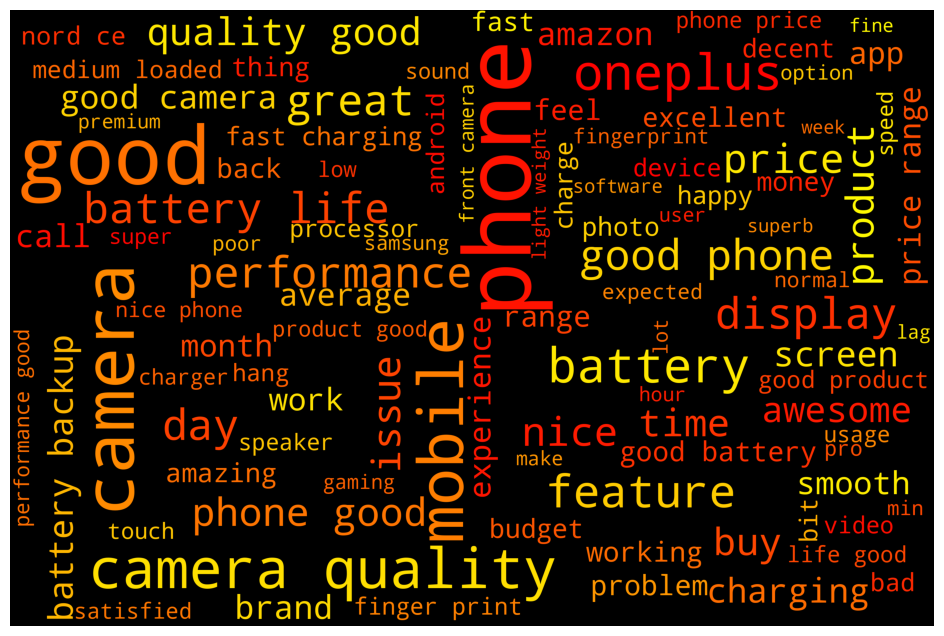

In [354]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(20,8))
  plt.imshow(wordcloud)
  plt.axis('off')
allwords=' '.join([review for review in lemm_df['lema']])
wordscolud=WordCloud(width=3000,height=2000,background_color='black',max_font_size=300,max_words=100,colormap='autumn').generate(allwords)
plot_cloud(wordscolud)

positive comment words

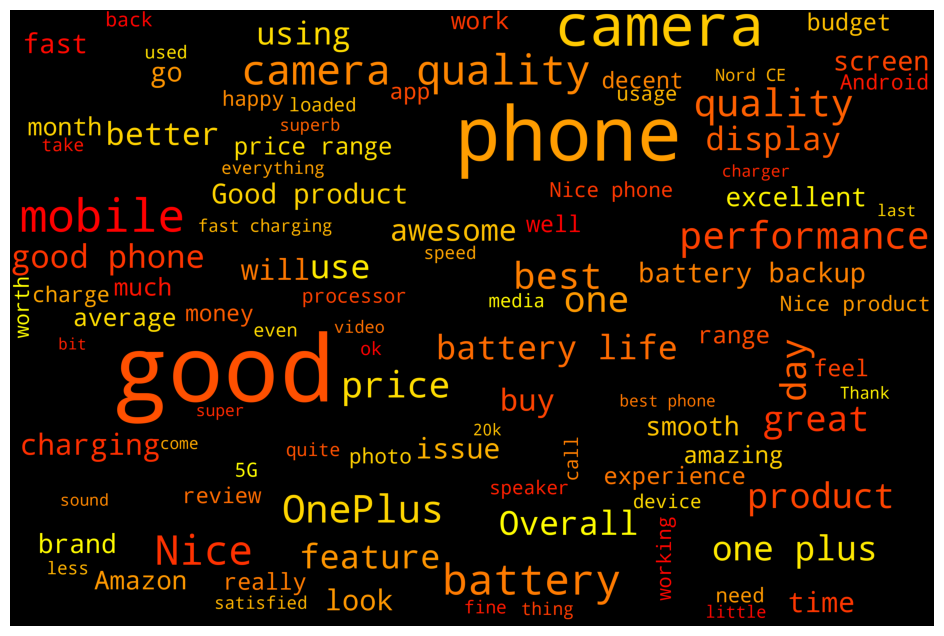

In [355]:
allwords=' '.join([text for text in user_review_sentiment['Review'][user_review_sentiment.status == 'postive']])
wordscolud=WordCloud(width=3000,height=2000,background_color='black',max_font_size=300,max_words=100,colormap='autumn').generate(allwords)
plot_cloud(wordscolud)

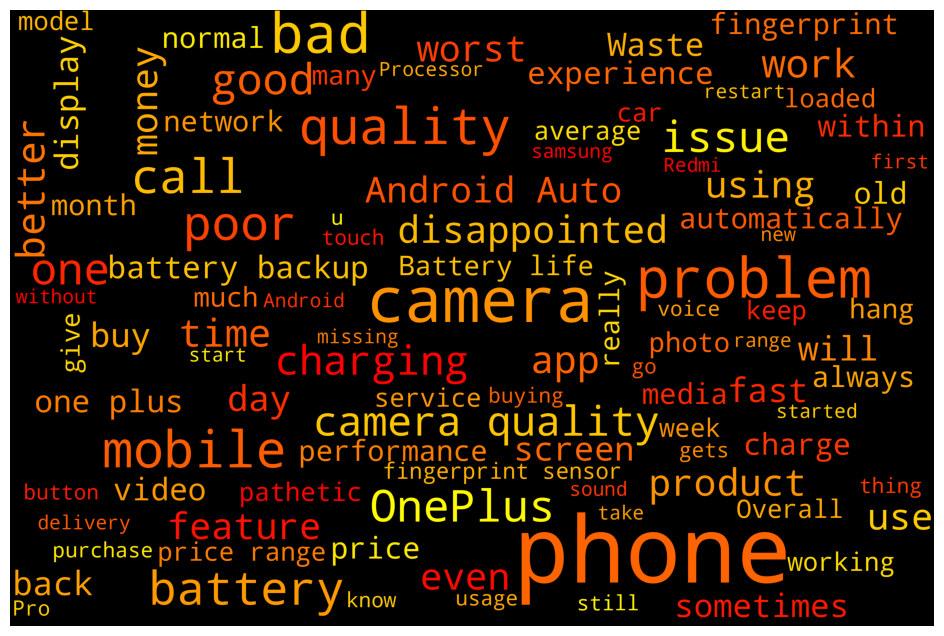

In [352]:
allwords=' '.join([text for text in user_review_sentiment['Review'][user_review_sentiment.status == 'Negative']])
wordscolud=WordCloud(width=3000,height=2000,background_color='black',max_font_size=300,max_words=100,colormap='autumn').generate(allwords)
plot_cloud(wordscolud)